In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset_mood_smartphone.csv")
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [2]:
# do we need to check why unnamed colum is different than number of rows or can we just remove it?

In [3]:
# only 27 unique id's, 4, 11, 18, 21, 22 missing from 1 to 33.
df.nunique()
df['id'].unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  376912 non-null  int64  
 1   id          376912 non-null  object 
 2   time        376912 non-null  object 
 3   variable    376912 non-null  object 
 4   value       376710 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


In [5]:
# 202 rows with no value
df.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [6]:
# blocks warning from distplot, since it will soon be depreciated 
import warnings
warnings.filterwarnings('ignore')

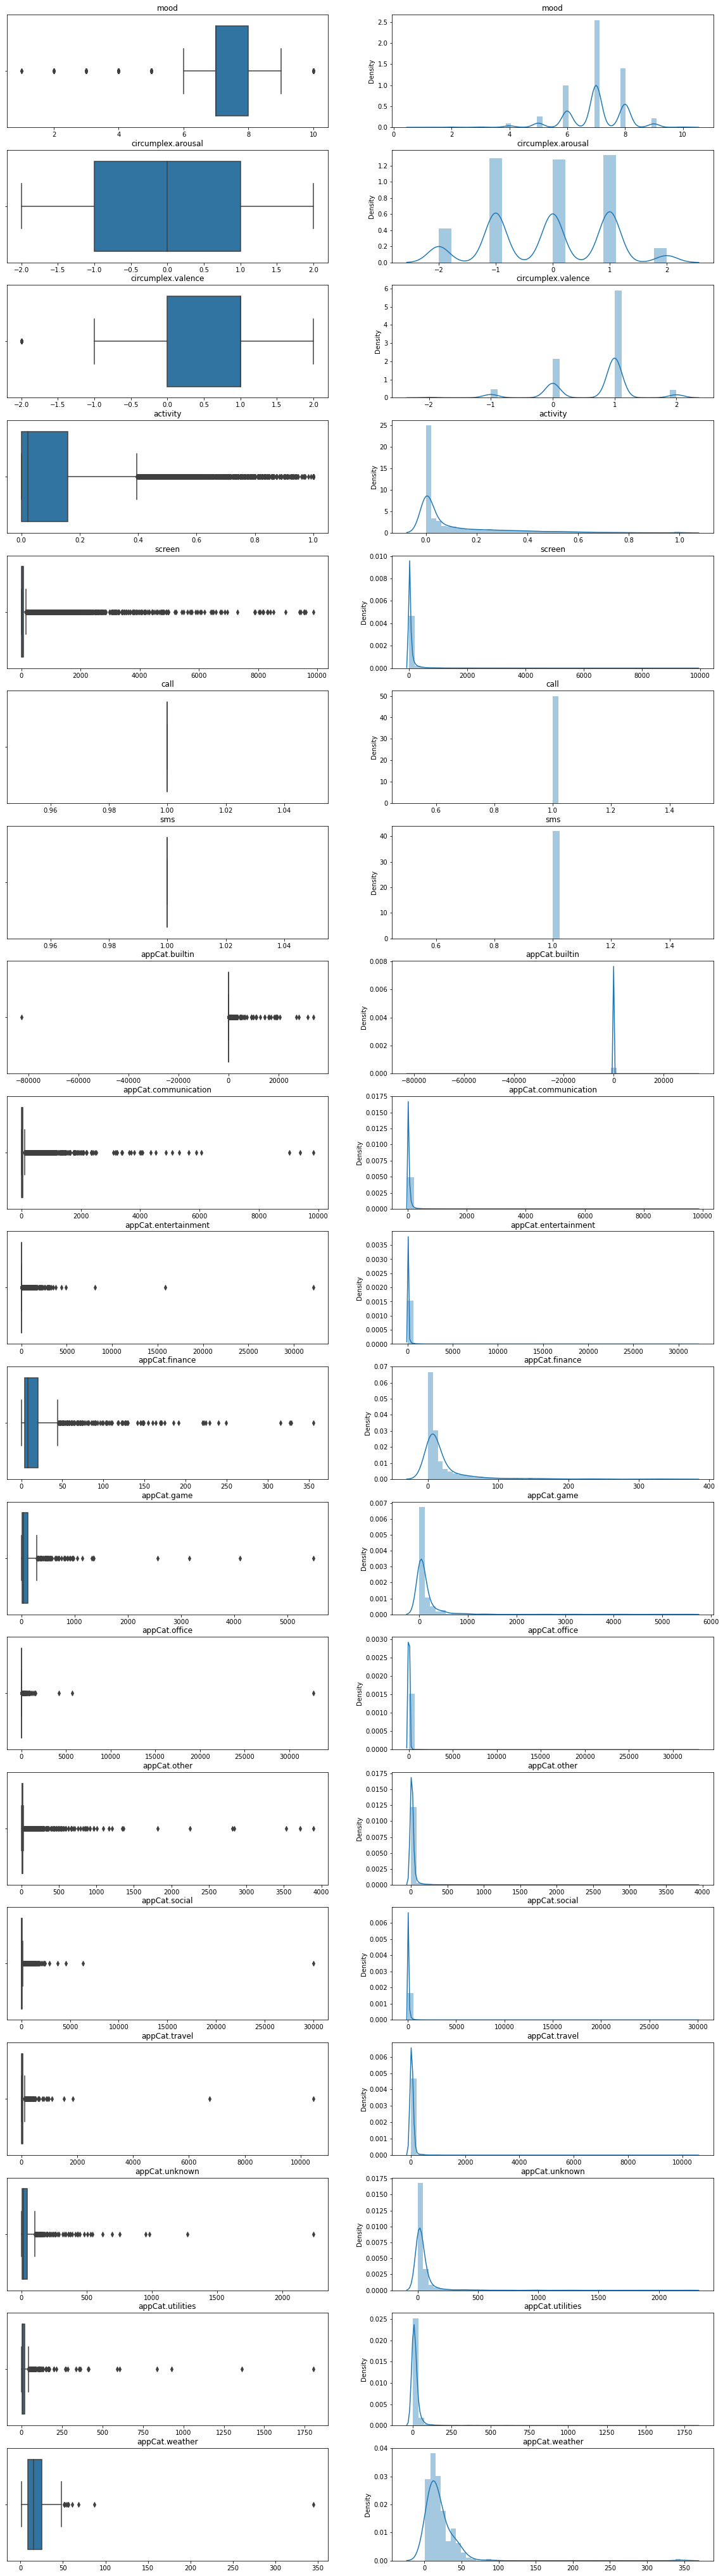

In [20]:
# 19 unique variables
# 'appCat.builtin' has negative duration -> isn't possible
# problem -> lots of outiers and lots of values 0/nan. Maybe check the outliers for each individual. 
# Possible to transform data if data distribution violates model?
fig, ax = plt.subplots(19, 2, figsize = (20, 74))
i = 0
for variable in df["variable"].unique():
    var = df[df['variable'] == variable]
    g1 = sns.boxplot(x= var["value"], ax = ax[i,0]).set(title="%s"% variable,xlabel=None)
    g2 = sns.distplot(var["value"], ax = ax[i,1]).set(title="%s"% variable,xlabel=None)
    i += 1

In [21]:
df_num_corr = df_avg.corr()['mood'][1:]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

,Unnamed: 0,value
count,3.769120e+05,376710.000000
mean,4.501273e+05,40.665313
std,5.411519e+05,273.726007
min,1.000000e+00,-82798.871000
25%,9.422875e+04,2.025000
50%,2.274385e+05,7.029000
75%,5.160412e+05,29.356000
max,1.427711e+07,33960.246000
